# Load the OSHA Injuries Dataset

In [1]:
# Import modules for LLM finetuning and evaluation
import finetune as ft
import evaluate as ev

In [2]:
import pandas as pd
from datasets import Dataset

data = pd.read_csv("dataset/January2015toJuly2024.csv", low_memory=False)
data["NatureTitle"] = data["NatureTitle"].map(lambda x : x.strip() if type(x) is str else x)

In [11]:
[min(top_classes.to_list())] * 10

[1260, 1260, 1260, 1260, 1260, 1260, 1260, 1260, 1260, 1260]

Text(0.5, 0, 'Number of samples')

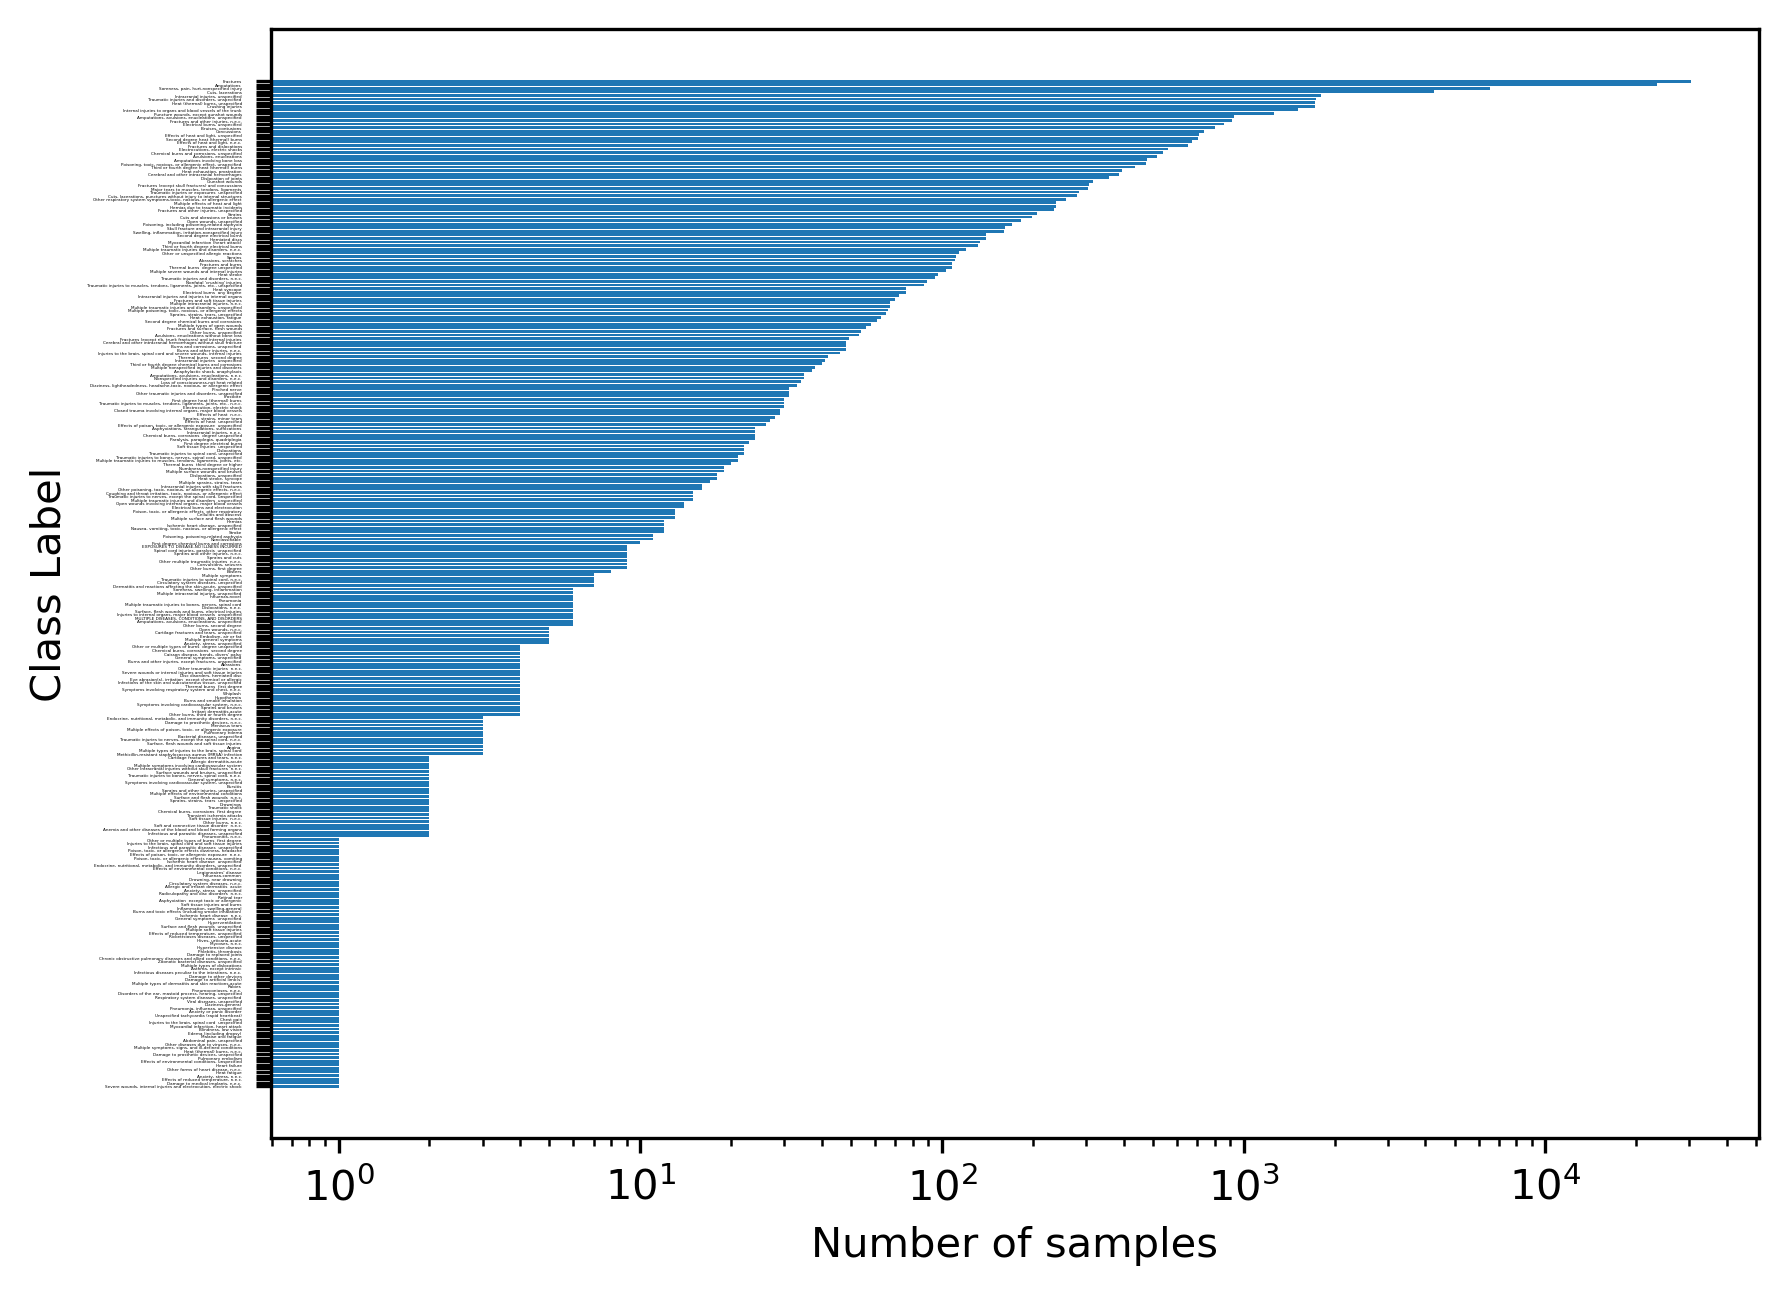

In [81]:
from matplotlib import pyplot as plt

top_classes = pd.Series([x.strip() for x in data["NatureTitle"].dropna()])
top_classes = top_classes.value_counts()
# Obtain top 50
pd.Series({name: count for (name, count) in top_classes.to_dict().items() if count > 50})

plt.barh(
    top_classes.keys(),
    top_classes.to_list()
)
plt.gca().invert_yaxis()
plt.xscale('log')
plt.yticks(fontsize=1, rotation=0)
#plt.yticks([])
plt.ylabel("Class Label")
plt.xlabel("Number of samples")

In [77]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

Text(0.5, 0, 'Number of samples')

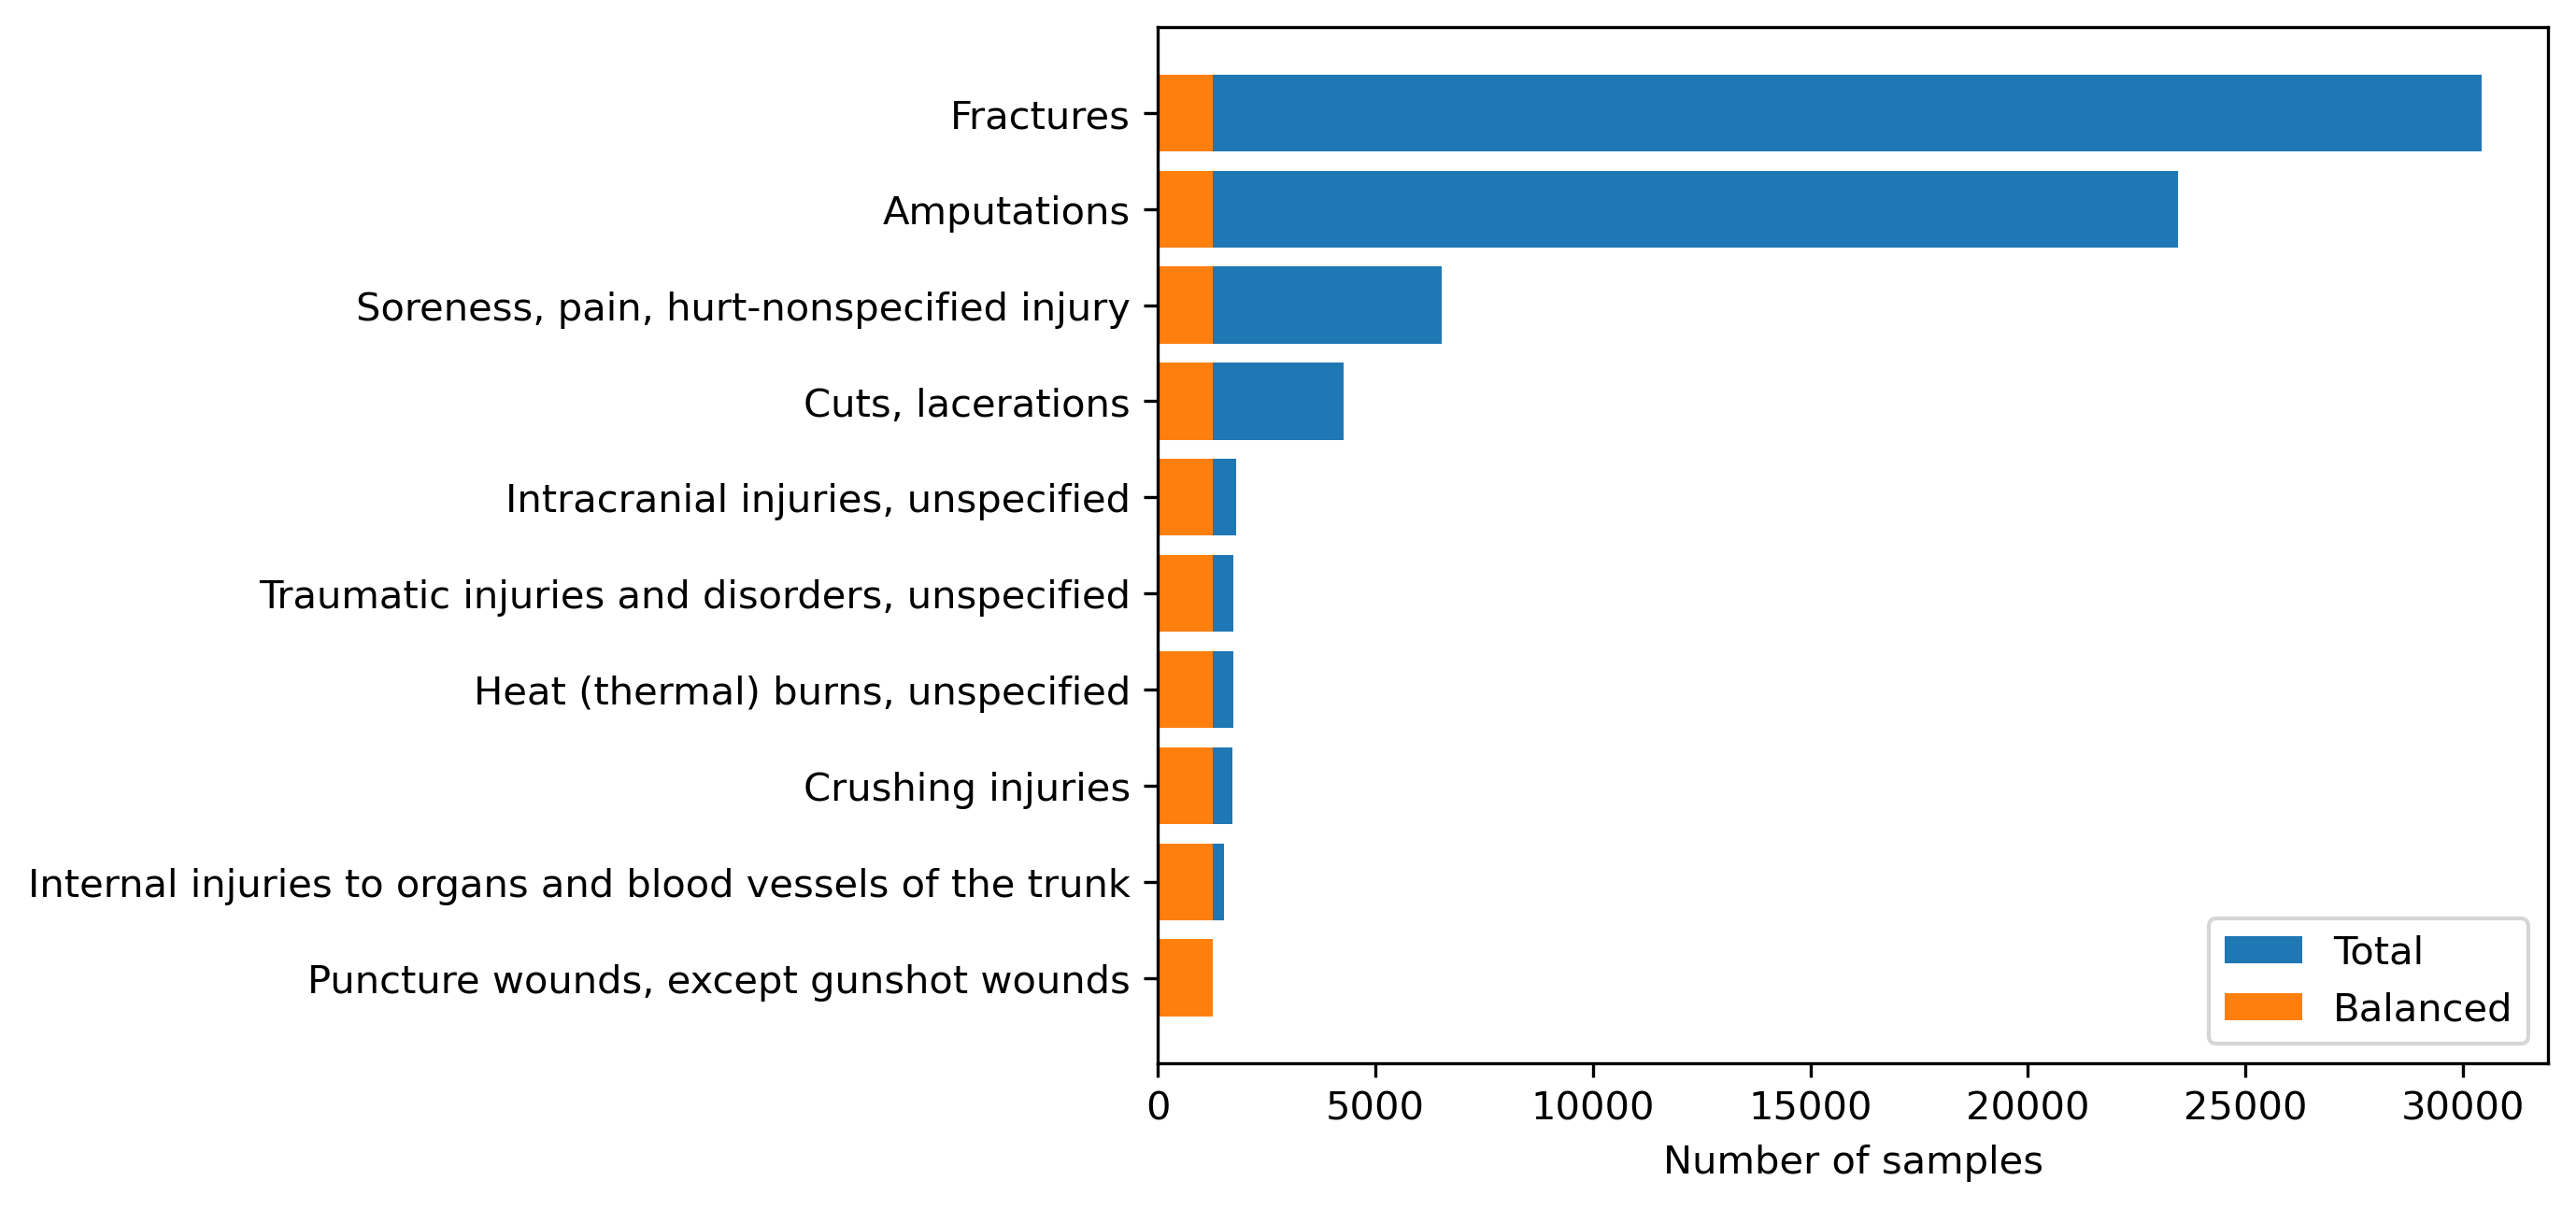

In [79]:
from matplotlib import pyplot as plt
top_classes = pd.Series([x.strip() for x in data["NatureTitle"].dropna()])
top_classes = top_classes.value_counts().iloc[0:10]
plt.barh(
    top_classes.keys(),
    top_classes.to_list()
)
plt.barh(
    top_classes.keys(),
    [min(top_classes.to_list())] * 10
)
plt.gca().invert_yaxis()
plt.legend(["Total", "Balanced"])
plt.xlabel("Number of samples")

In [4]:
dataset = ft.create_dataset_from_dataframe(data, "Final Narrative", "NatureTitle")

Casting to class labels:   0%|          | 0/93589 [00:00<?, ? examples/s]

In [5]:
dataset['train'].features['label'].names[0:10]

[' Abrasions ',
 ' Allergic and irritant dermatitis  acute',
 ' Amputations',
 ' Amputations involving bone loss',
 ' Amputations, avulsions, enucleations  unspecified',
 ' Anaphylactic shock, anaphylaxis',
 ' Anemia and other diseases of the blood and blood forming organs',
 ' Anxiety, stress  unspecified',
 ' Asphyxiation  except toxic or allergenic',
 ' Asphyxiations, strangulations, suffocations']

In [6]:
dataset = ft.select_top_n_classes(dataset, n=10)

Filter:   0%|          | 0/84230 [00:00<?, ? examples/s]

Casting the dataset:   0%|          | 0/65764 [00:00<?, ? examples/s]

Map:   0%|          | 0/65764 [00:00<?, ? examples/s]

Casting to class labels:   0%|          | 0/65764 [00:00<?, ? examples/s]

Filter:   0%|          | 0/9359 [00:00<?, ? examples/s]

Casting the dataset:   0%|          | 0/7314 [00:00<?, ? examples/s]

Map:   0%|          | 0/7314 [00:00<?, ? examples/s]

Casting to class labels:   0%|          | 0/7314 [00:00<?, ? examples/s]

In [9]:
dataset = ft.sample_dataset(dataset, ratio=1)

Flattening the indices:   0%|          | 0/65764 [00:00<?, ? examples/s]

Flattening the indices:   0%|          | 0/7314 [00:00<?, ? examples/s]

In [10]:
dataset, label_names = ft.preprocess_dataset(dataset)

Casting the dataset:   0%|          | 0/13510 [00:00<?, ? examples/s]

Map:   0%|          | 0/13510 [00:00<?, ? examples/s]

Map:   0%|          | 0/13510 [00:00<?, ? examples/s]

Casting the dataset:   0%|          | 0/1620 [00:00<?, ? examples/s]

Map:   0%|          | 0/1620 [00:00<?, ? examples/s]

Map:   0%|          | 0/1620 [00:00<?, ? examples/s]

# Model output analysis

In [ ]:
output = "output/osha/fine-tuned/answers.csv"
output = pd.read_csv(output)

In [ ]:
n = 15 # number of top classes

labels = output["True Label"].value_counts().iloc[0:n].keys()

plt.barh(
    output["True Label"].value_counts().iloc[0:n].keys(),
    output["True Label"].value_counts().iloc[0:n].to_list(),
    alpha=0.5
)

plt.barh(
    output["Predicted Label"].value_counts().iloc[0:n].keys(),
    output["Predicted Label"].value_counts().iloc[0:n].to_list(),
    alpha=0.5
)

plt.gca().invert_yaxis()
plt.legend(labels=["True", "Predicted"])